In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

plt.style.use('bmh')

In [2]:
data = pd.read_csv('../ts_data/example_wp_log_R_outliers1.csv', parse_dates=['ds'])
data 

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


## outliers mess up the uncertainty estimation

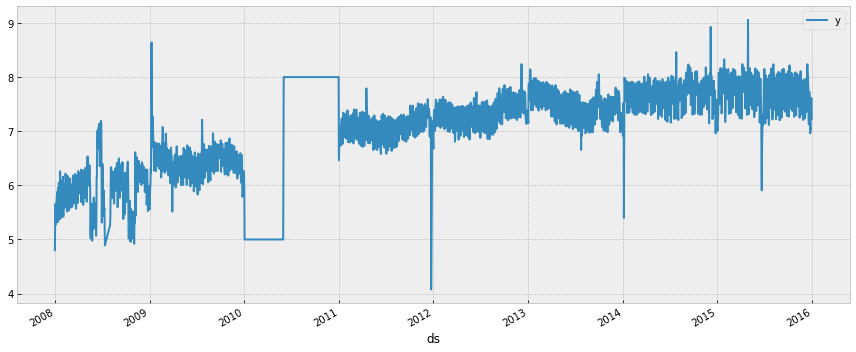

In [3]:
data.plot('ds', 'y', figsize=(12,5))
plt.tight_layout()
plt.show()

In [4]:
m = Prophet(interval_width=0.95)
m.fit(data)
future = m.make_future_dataframe(periods=1000)
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.5336
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7104.49     0.0181957       622.153           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7276.36    0.00710093       1979.13      0.4674     0.04674      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7395.41     0.0204892       1131.56      0.3474           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        7433.9     0.0047112       390.058       2.242      0.2242      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       7461.09    0.00178987       232.115           1           1      587   
    Iter      log prob        ||dx||      ||grad||       alpha  

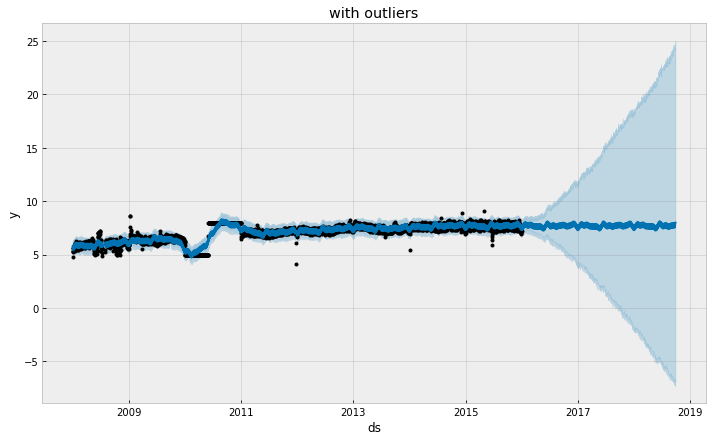

In [5]:
# outliers mess up with uncertainty interval
m.plot(forecast)
plt.title('with outliers');

In [6]:
# remove outliers
data.loc[(data['ds'] > '2010-01-01') & (data['ds'] < '2011-01-01'), 'y'] = None
m2 = Prophet(interval_width=0.95)
m2.fit(data)
future = m2.make_future_dataframe(periods=1000)
forecast2 = m2.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -21.2638
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99        7990.5     0.0203161       6396.81      0.4566           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8004.38     0.0020455       99.6543           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8005.46   0.000398299       254.769           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       8005.47   2.68631e-05       126.711   5.065e-07       0.001      408  LS failed, Hessian reset 
     335       8005.65   3.22411e-05        196.09   8.949e-08       0.001      490  LS failed, 

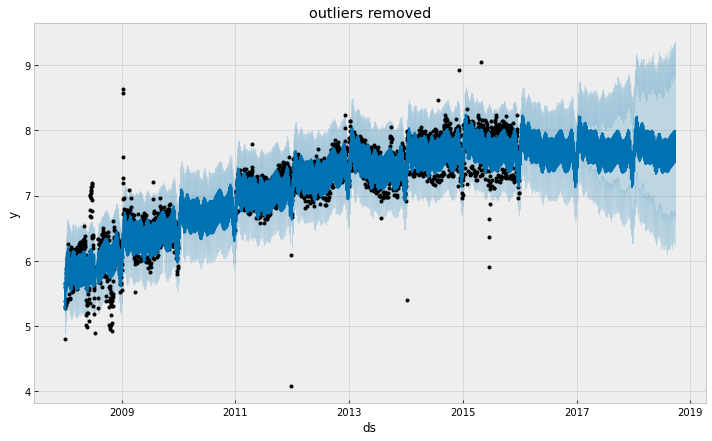

In [7]:
m2.plot(forecast2)
plt.title('outliers removed');

## outliers mess up the seasonality estimate

In [8]:
data2 = pd.read_csv('../ts_data/example_wp_log_R_outliers2.csv', parse_dates=['ds'])
data2

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


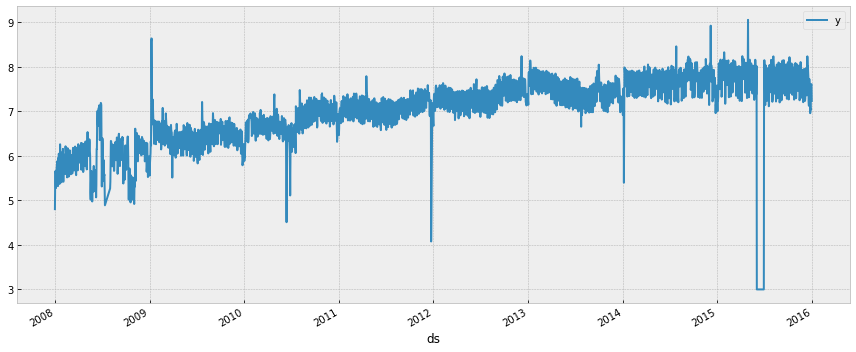

In [9]:
data2.plot('ds', 'y', figsize=(12,5))
plt.tight_layout()
plt.show()

In [10]:
m3 = Prophet(interval_width=0.95)
m3.fit(data2)
future = m3.make_future_dataframe(periods=1000)
forecast3 = m3.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -27.5907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       6936.51    0.00250399       118.007           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       6938.18   0.000165189       232.601    7.78e-07       0.001      256  LS failed, Hessian reset 
     199       6938.87   0.000149899       86.2902           1           1      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       6939.07    8.2416e-05       140.638    8.04e-07       0.001      429  LS failed, Hessian reset 
     299       6939.12   7.25885e-06       62.0598       0.874       0.874      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  #

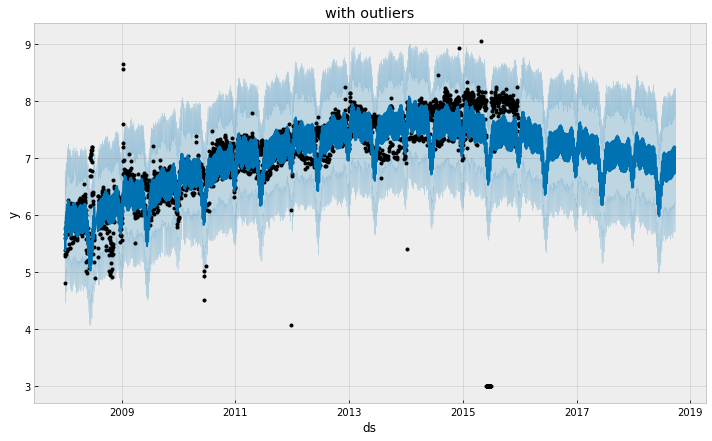

In [11]:
# always predict the extreme low

m3.plot(forecast3)
plt.title('with outliers');

In [12]:
# remove outliers

data2.loc[(data2['ds'] > '2015-06-01') & (data2['ds'] < '2015-06-30'), 'y'] = None
m4 = Prophet(interval_width=0.95)
m4.fit(data2)
future = m4.make_future_dataframe(periods=1000)
forecast4 = m4.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.7625
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9052.23    0.00370959       428.969           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       9068.14   3.87555e-05        239.25   2.829e-07       0.001      283  LS failed, Hessian reset 
     199       9068.16   0.000333784       200.002           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9071.11   0.000105319        145.79      0.4567      0.4567      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       9071.66   8.95724e-05        341.34   3.554e-07       0.001      478  LS failed, Hessian reset 
     399       9072.33    0.00159905       238.337           1           1      570   
    Iter      log pro

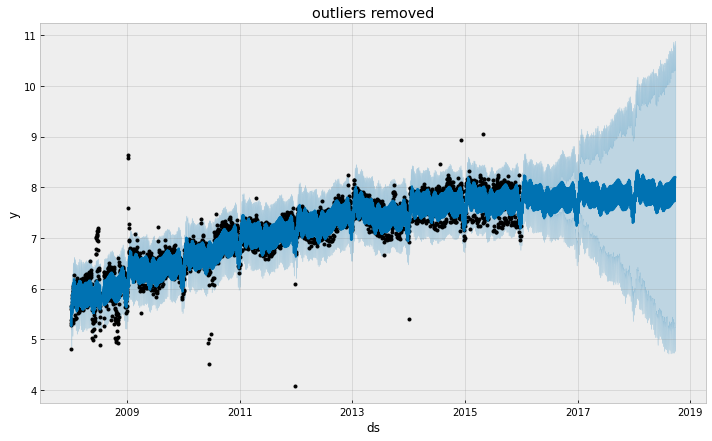

In [13]:
m4.plot(forecast4)
plt.title('outliers removed');